In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from encodings.aliases import aliases

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets-py/crime.csv
/kaggle/input/datasets-py/Project2-CarsDataset.csv
/kaggle/input/datasets-py/Project_Weather_Dataset.csv


In [10]:
# Create a set of all available encodings
alias_values = set(aliases.values())
encoding_list = []

try:
    for encodings in alias_values:
        crime_df = pd.read_csv('/kaggle/input/datasets-py/crime.csv', nrows=10, encoding=encodings)
        encoding_list.append(encodings)
except:
    pass

encoding_list

['cp863', 'gbk', 'mac_cyrillic']

In [13]:
# load entire dataset into dataframe
crime_df = pd.read_csv('/kaggle/input/datasets-py/crime.csv', encoding='gbk')
crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [14]:
# shape
crime_df.shape

(319073, 17)

In [15]:
# information
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [17]:
# convert object to date time 
crime_df.OCCURRED_ON_DATE = pd.to_datetime(crime_df.OCCURRED_ON_DATE)

In [21]:
# information 
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       319073 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART             318983 non-null  object        
 13  STREET        

In [28]:
# check duplicated values 
crime_df.duplicated().sum()

23

In [33]:
# value_counts 
offence_type = crime_df['OFFENSE_CODE_GROUP'].value_counts()

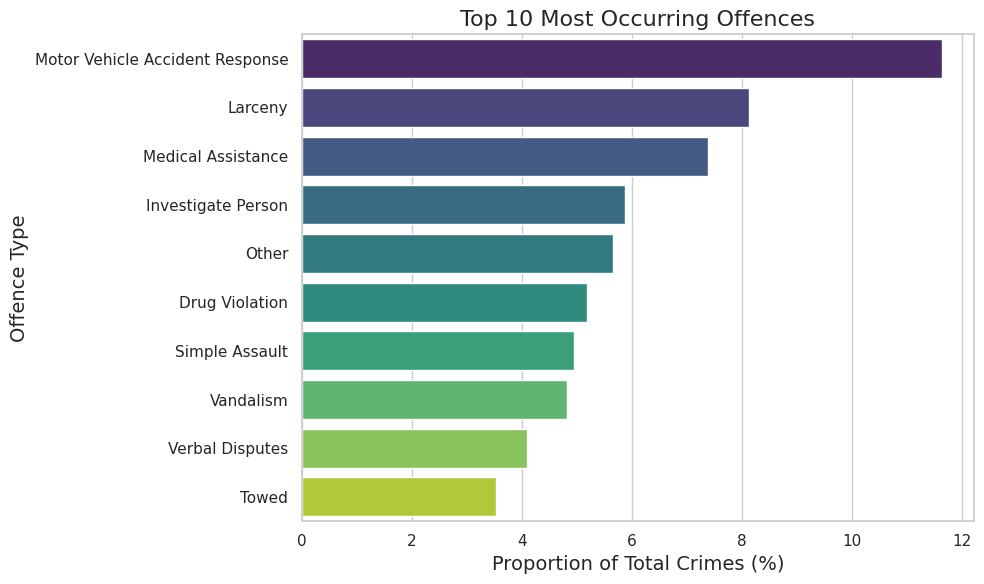

In [45]:
# Top 10 offence occuring visualize it 
top10_offences = (offence_type[:10]/crime_df.shape[0])*100

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Offence': top10_offences.index,
    'Proportion': top10_offences.values
})
# List of palettes to try
#palettes = ['cubehelix', 'mako', 'rocket', 'viridis', 'inferno', 'plasma', 'magma', 'cividis']
palettes = ['flare', 'crest', 'ch:s=-.2,r=.6', 'icefire', 'twilight', 'Spectral', 'coolwarm', 'Wistia']



#for palette in palettes:
# Plotting the bar chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Proportion', y='Offence', data=plot_data, palette="viridis")

# Adding chart attributes
bar_plot.set_title('Top 10 Most Occurring Offences', fontsize=16)
bar_plot.set_xlabel('Proportion of Total Crimes (%)', fontsize=14)
bar_plot.set_ylabel('Offence Type', fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()

In [49]:
# checking columns having null values
crime_df.columns[np.sum(crime_df.isnull(), axis=0)!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [50]:
# checking column with no missing values
crime_df.columns[np.sum(crime_df.isnull(), axis=0)==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [52]:
# displaying unique crime code groups
crime_df.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

In [76]:
# Most common offence decsription
count_unique_description = ((crime_df.OFFENSE_DESCRIPTION.value_counts())/crime_df.shape[0])*100

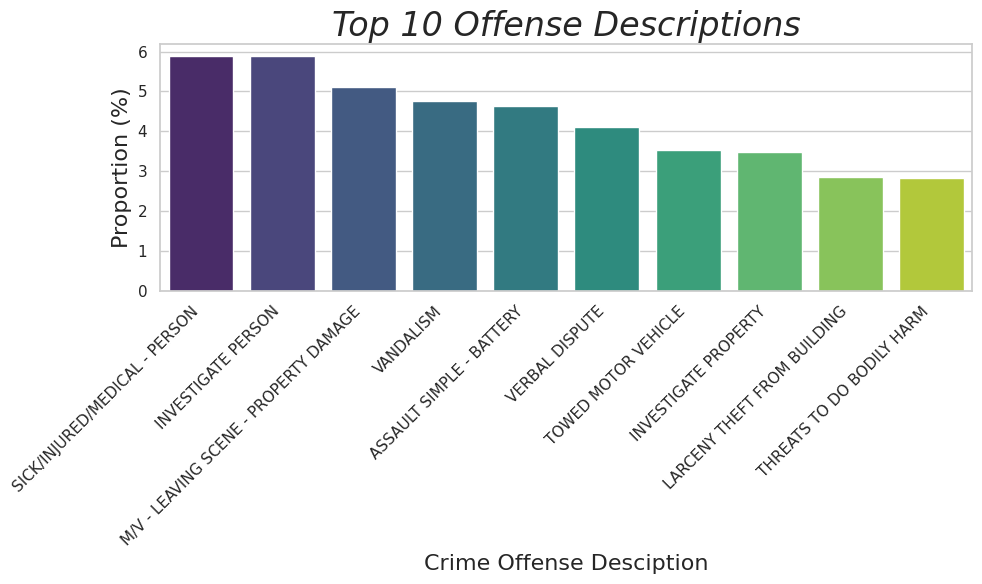

In [81]:
# visualize the  top 10 crime description
plot_data = pd.DataFrame({
    'Crime Offense Description': count_unique_description[:10].index,
    'Proportion' : count_unique_description[:10].values
})

sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))

# creating a bar chart using sns
bar_plot1 = sns.barplot(
              x = 'Crime Offense Description',
              y = 'Proportion',
              data = plot_data,
              palette = 'viridis')

# Set plot title and labels
bar_plot1.set_title("Top 10 Offense Descriptions", fontsize=24, fontstyle = 'italic')
bar_plot1.set_xlabel('Crime Offense Desciption', fontsize=16)
bar_plot1.set_ylabel('Proportion (%)', fontsize = 16)

# Adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

In [101]:
# Group by year, month, and day
crime_by_year = crime_df.groupby('YEAR').size().reset_index(name='Count')
crime_by_month = crime_df.groupby('MONTH').size().reset_index(name='Count')
crime_by_day = crime_df.groupby('DAY_OF_WEEK').size().reset_index(name='Count')

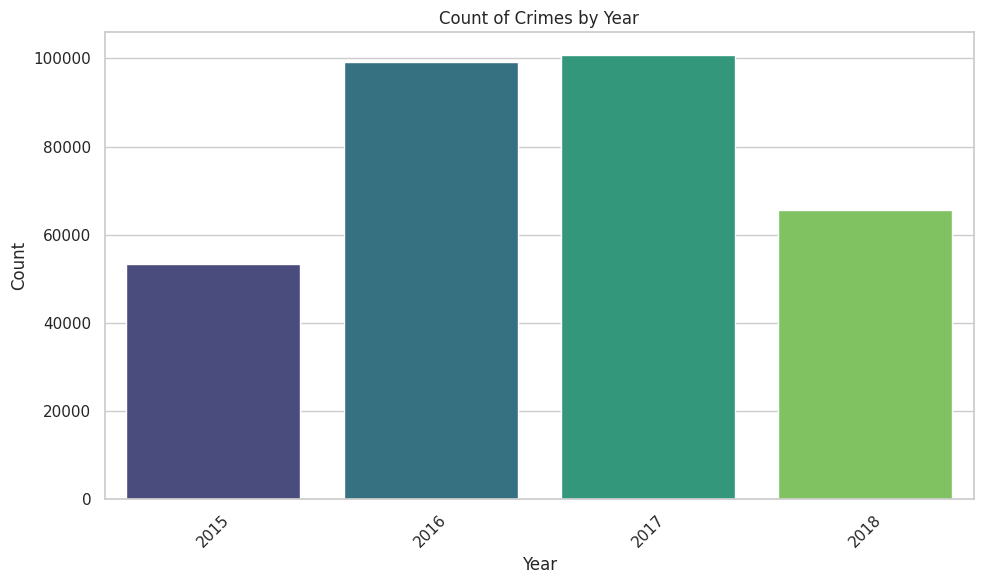

In [102]:
# Group Count of Crime by time - Year, Month, Day
# Plot Crimes by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='Count', data=crime_by_year, palette='viridis')
plt.title('Count of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

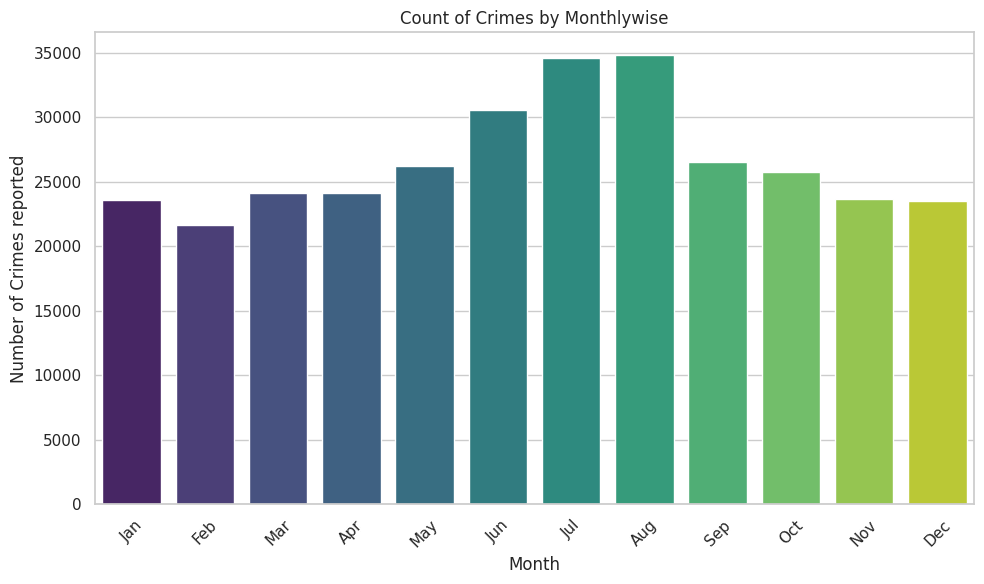

In [109]:
# Plot Crimes by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='Count', data=crime_by_month, palette='viridis')
plt.title('Count of Crimes by Monthlywise')
plt.xlabel('Month')
plt.ylabel('Number of Crimes reported')
# Customize x-axis labels
plt.xticks(rotation=45,ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

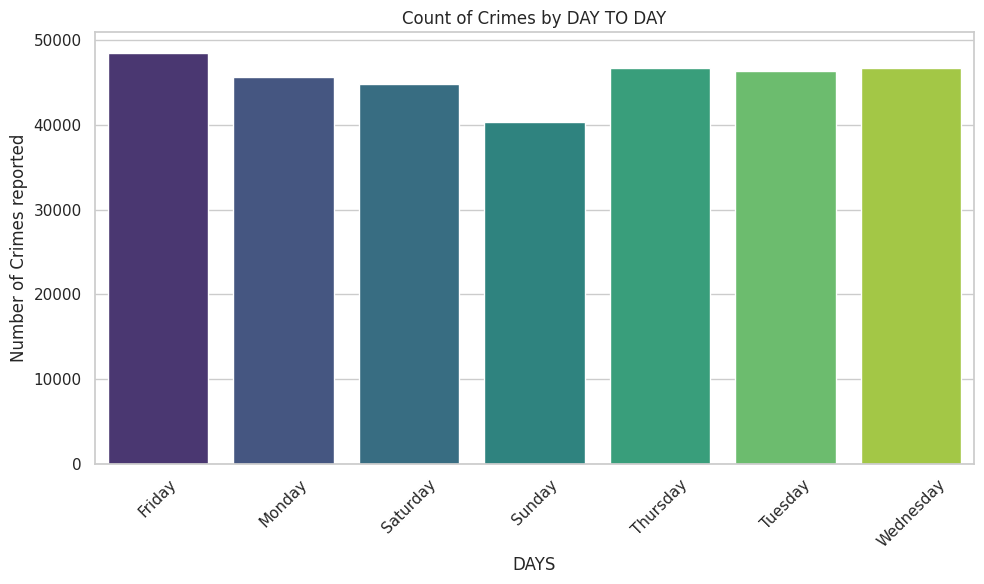

In [110]:
# Plot Crimes by Day wise
plt.figure(figsize=(10, 6))
sns.barplot(x='DAY_OF_WEEK', y='Count', data=crime_by_day, palette='viridis')
plt.title('Count of Crimes by DAY TO DAY')
plt.xlabel('DAYS')
plt.ylabel('Number of Crimes reported')
# Customize x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
# if the value is less than the average crime per month, highlight the value in blue

avg_crime = crime_df.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime_df.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2



# Function to style negative values
def style_negative(value):
    if isinstance(value, (int, float)) and value < 0:
        return 'color: red'
    else:
        return ''

# Apply styles using Styler.map for elementwise operations
styled_df = df.style.format({'Value': '{:.2f}'}) \
                .applymap(style_negative, subset=['Value']) \
                .apply(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None, subset=['Value'])

# Display the styled DataFrame
styled_df

The average number of crimes is 7976.825


/tmp/ipykernel_33/2625495887.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
/tmp/ipykernel_33/2625495887.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7993.000000,7782.000000
2,nan,7308.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4191.000000,8558.000000,8985.000000,8834.000000
7,8324.000000,8619.000000,9075.000000,8538.000000
8,8342.000000,8938.000000,9206.000000,8337.000000
9,8414.000000,8522.000000,8940.000000,667.000000
